In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from joblib import dump, load
from sklearn.preprocessing import PolynomialFeatures, Normalizer, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('csvs/cluster_mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df_dummies = pd.get_dummies(df.drop('name', axis=1))
df_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True


In [4]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df_dummies)
scaled_df = pd.DataFrame(scaled_data, columns=df_dummies.columns)
scaled_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0


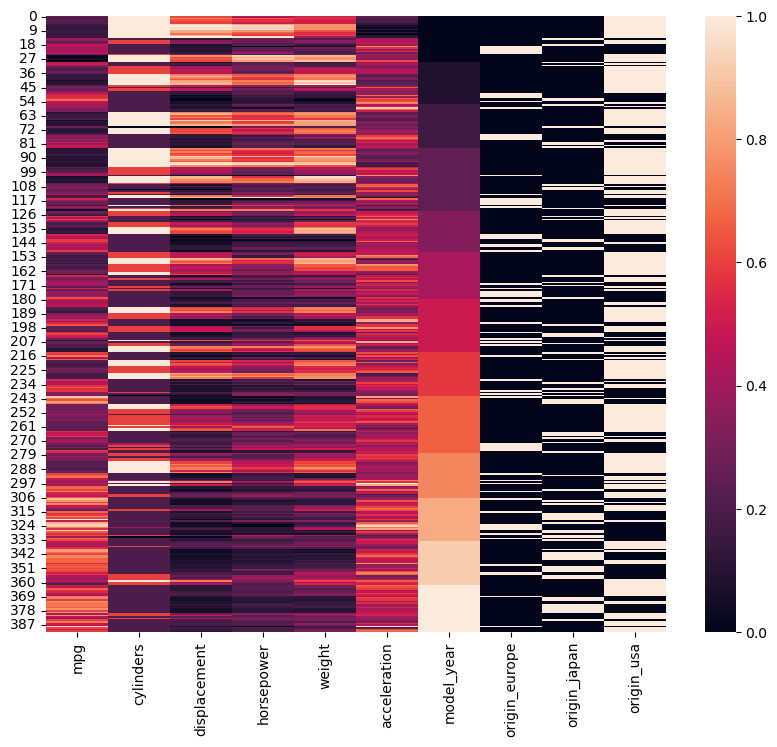

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(scaled_df)
plt.show()

# The heatmap Y-axis contain all the rows from
# the scaled dataset and the X-axis contain all
# the columns.
# The color represent the value of the column
# for each row in the data set scaled from black
# (0 value) to white (1 value)



<Figure size 1000x800 with 0 Axes>

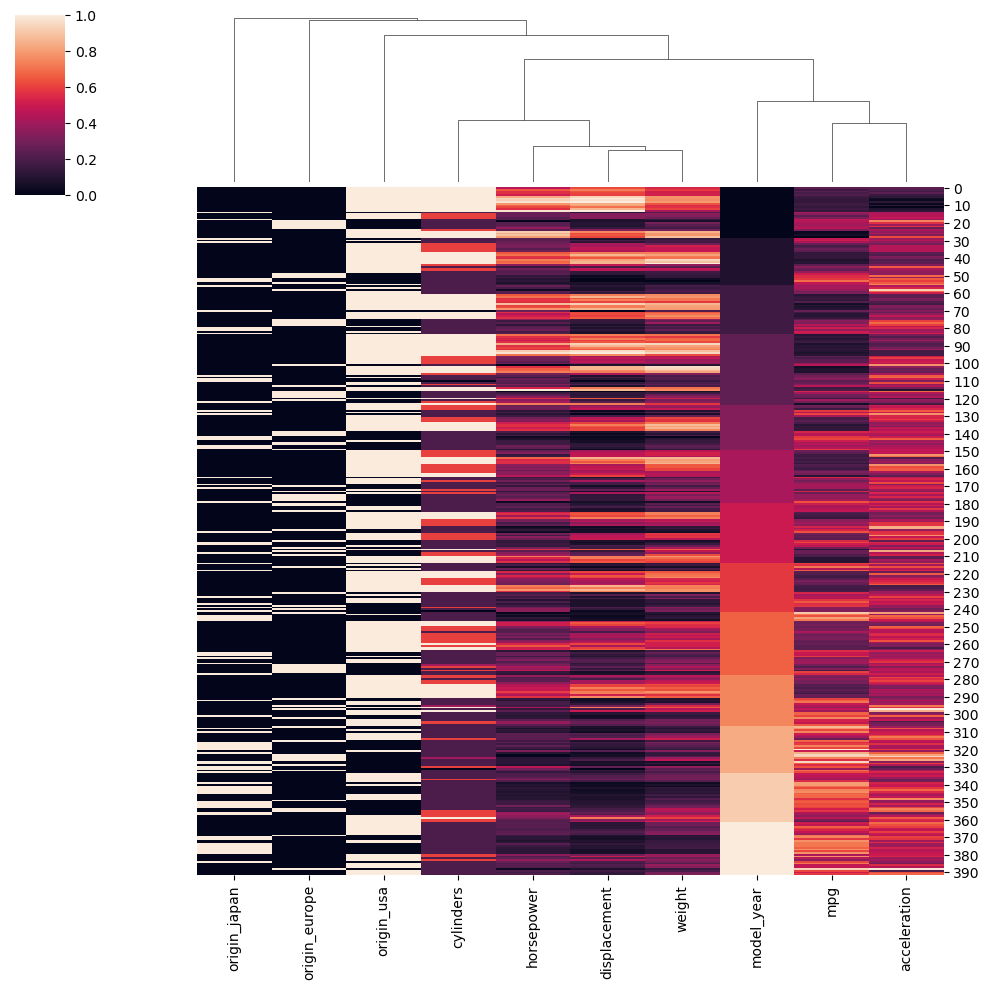

In [6]:
plt.figure(figsize=(10, 8))
sns.clustermap(scaled_df, row_cluster=False)
plt.show()

# Dendrogram on the dataset columns

<Figure size 1000x800 with 0 Axes>

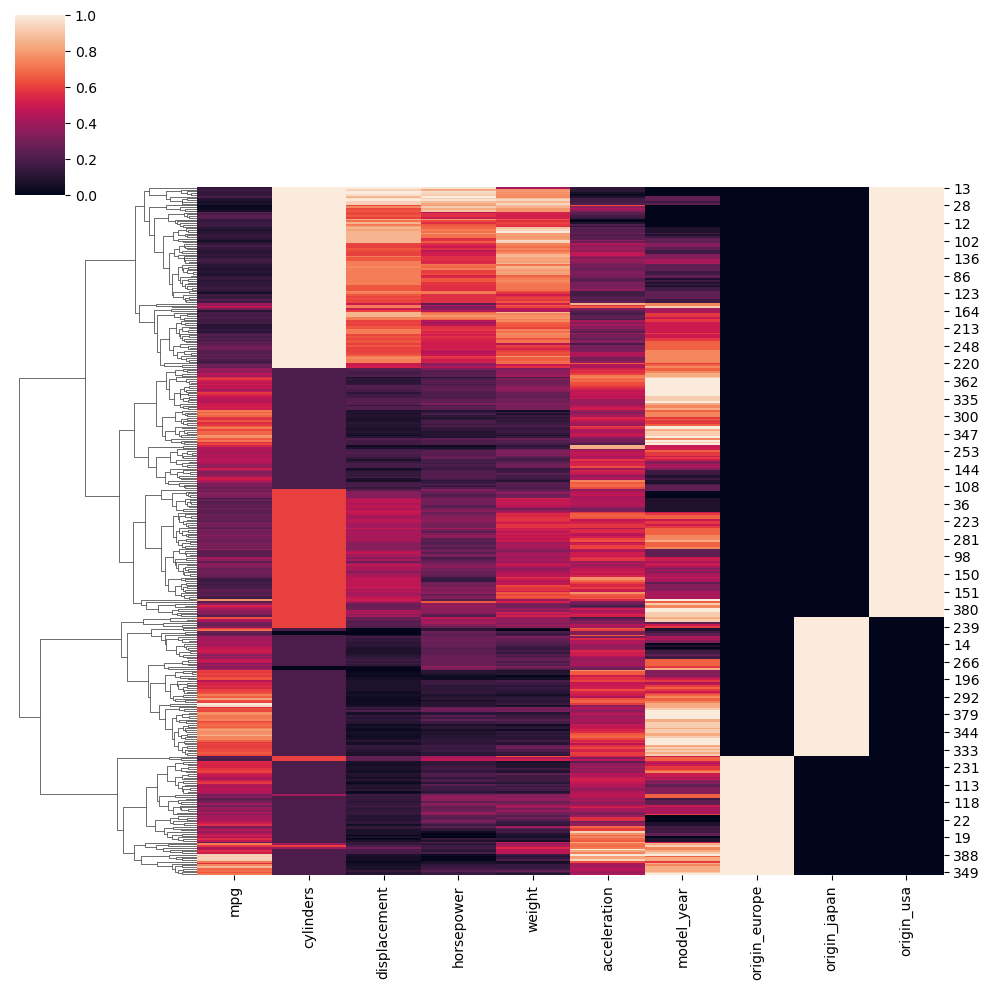

In [7]:
plt.figure(figsize=(10, 8))
sns.clustermap(scaled_df, col_cluster=False)
plt.show()

# Dendrogram on the dataset rows


In [8]:
scaled_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.244313,0.451454,-0.565161
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.352324,-0.404209,0.610494
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.371633,-0.440825,0.655936
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.284948,-0.321936,0.489625
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.293841,-0.447929,0.600978
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.208298,0.115020,-0.258224
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.037745,0.199841,-0.136065
origin_europe,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,1.000000,-0.230157,-0.591434
origin_japan,0.451454,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.230157,1.000000,-0.648583
origin_usa,-0.565161,0.610494,0.655936,0.489625,0.600978,-0.258224,-0.136065,-0.591434,-0.648583,1.000000


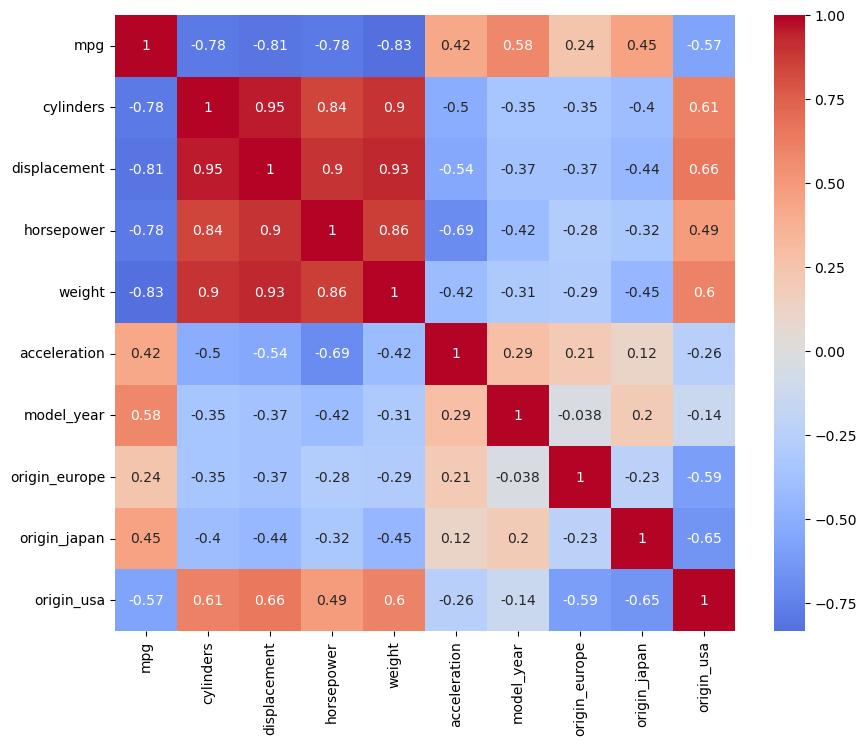

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

# We can also combine the
# correlation dataframe with heatmap
# for better correlation visualization

In [10]:
# Now that we explored the dataset, we can now start to train our Hierarchical Clustering model.
# When creating the model instance we need to choose the number of clusters it will divide our data to.
# The dufault value of clusters is 2 meaning it will perform bottom-up merging until getting 2 final clusters.
# In our example we will determine the ‘n_clusters’ parameter to be 4.
model = AgglomerativeClustering(n_clusters=4)

cluster_labels = model.fit_predict(scaled_df)

cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

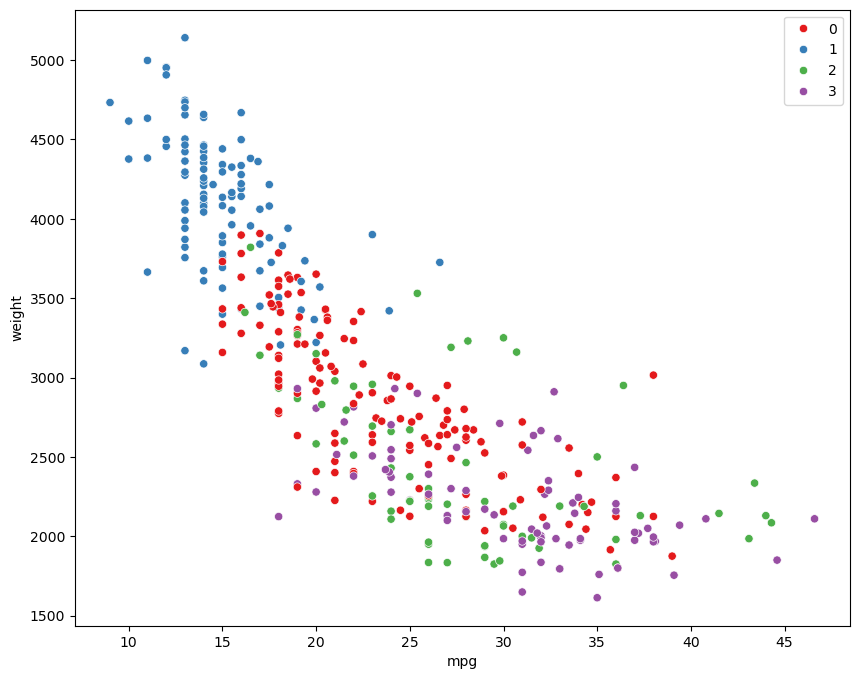

In [11]:
plt.figure(figsize=(10, 8))
sns.scatterplot(df, x='mpg', y='weight', hue=cluster_labels, palette='Set1')
plt.show()

# We can see that the model has clustered the data into 4 clusters.
# The clusters are based on the distance between the data points.
# The distance is calculated using the Euclidean distance.


In [12]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

# model.fit_predict(scaled_df)
# When setting the distance threshold to 0 meaning the model will cluster the data until all the data points are clusters.
# The model will stop clustering when the distance between the clusters is greater than the distance threshold.

# plt.figure(figsize=(10, 8))
# sns.scatterplot(df, x='mpg', y='weight', hue=model.labels_, palette='Set1')
# plt.show()

In [13]:
np.set_printoptions(suppress=True)
linked = linkage(scaled_df, 'ward')
# Here we use the ‘ward’ method which
# calculate the distance between the
# cluster centroids
linked

array([[ 67.        ,  68.        ,   0.0401977 ,   2.        ],
       [232.        , 234.        ,   0.0412867 ,   2.        ],
       [ 63.        ,  74.        ,   0.04316861,   2.        ],
       ...,
       [778.        , 779.        ,  10.74105893, 245.        ],
       [775.        , 777.        ,  12.18934549, 147.        ],
       [780.        , 781.        ,  19.30749251, 392.        ]])

In [14]:
# According the the linkage matrix, the
# model first merged data points in indexes
# 67 and 68, and the distance between
# those data points was 0.0402

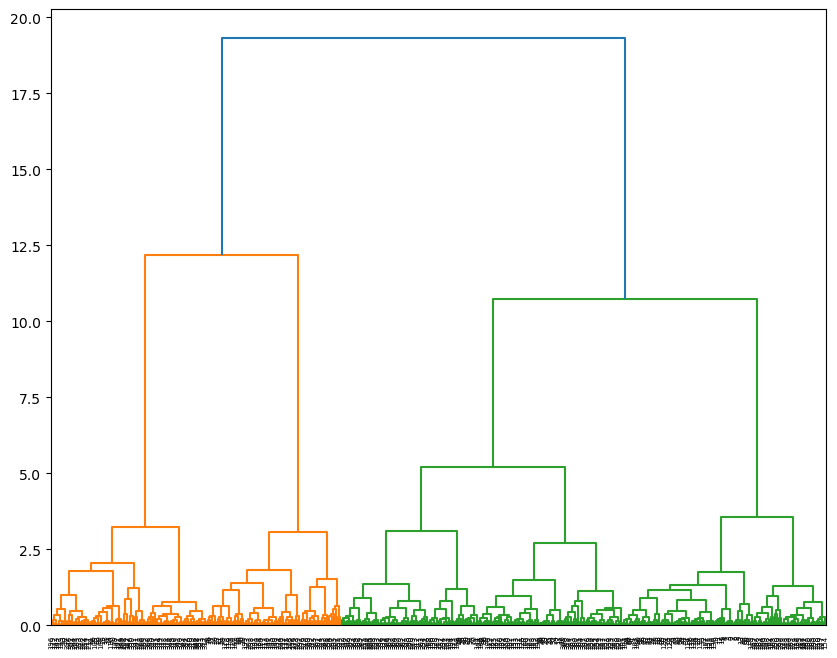

In [15]:
plt.figure(figsize=(10, 8))
dendrogram(linked, orientation='top', labels=range(0, len(scaled_df)), distance_sort='descending', show_leaf_counts=True)
plt.show()

# The dendrogram is a tree diagram that shows the hierarchical clustering of the data.
# The tree is constructed by linking the data points together based on the distance between them.
# The dendrogram is a tree diagram that shows the hierarchical clustering of the data.
# The tree is constructed by linking the data points together based on the distance between them.



Class Exercise - Hierarchical Clustering 26/03

Apply feature scaling using MinMaxScaler, apply other data preparation actions if needed.

In [16]:
iris_df = pd.read_csv('csvs/iris.csv')
print(iris_df.info())
print(iris_df['species'].value_counts())
iris_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
iris_df_dummies = pd.get_dummies(iris_df)
iris_df_dummies.head()

scaler = MinMaxScaler()
scaled_iris_df = scaler.fit_transform(iris_df_dummies)
scaled_iris_df = pd.DataFrame(scaled_iris_df, columns=iris_df_dummies.columns)
scaled_iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,0.222222,0.625000,0.067797,0.041667,1.0,0.0,0.0
1,0.166667,0.416667,0.067797,0.041667,1.0,0.0,0.0
2,0.111111,0.500000,0.050847,0.041667,1.0,0.0,0.0
3,0.083333,0.458333,0.084746,0.041667,1.0,0.0,0.0
4,0.194444,0.666667,0.067797,0.041667,1.0,0.0,0.0


Generate a clustermap for the entire dataset and visualize a dendrogram of the columns and
rows.

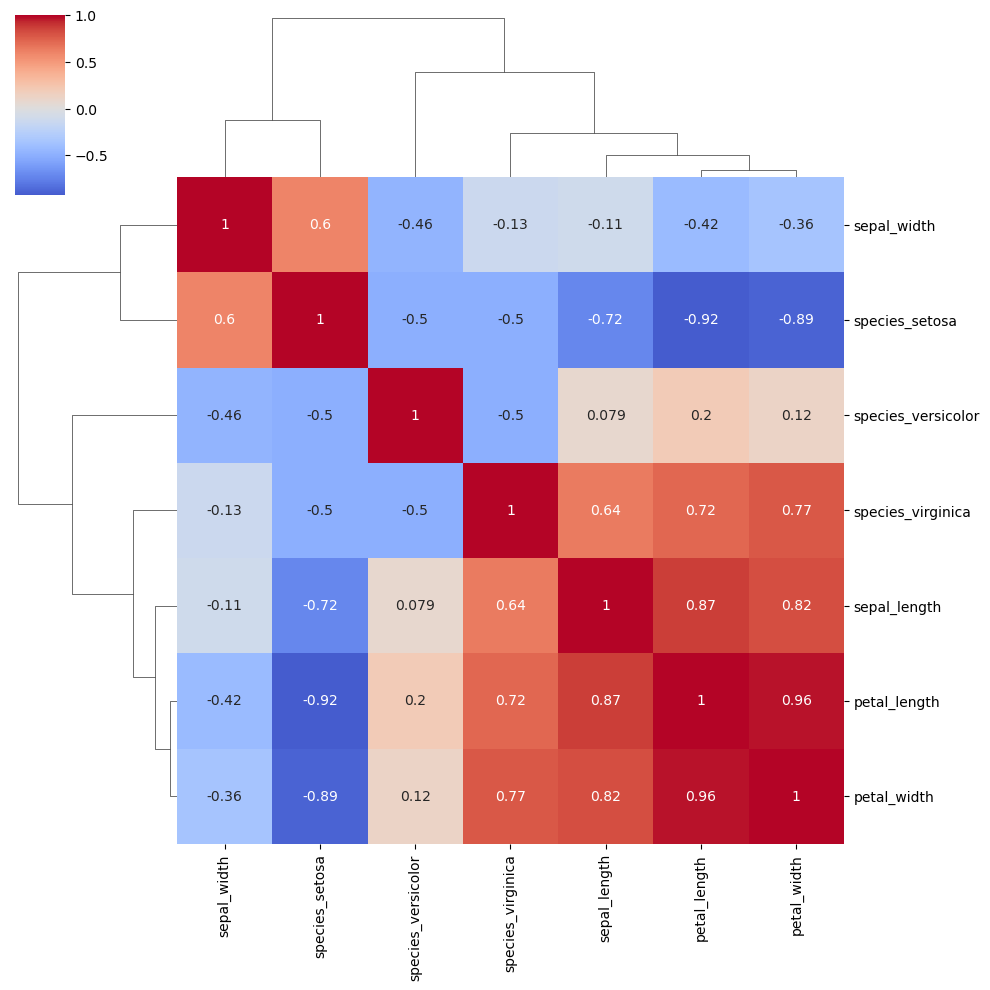

In [18]:
sns.clustermap(scaled_iris_df.corr(), annot=True, cmap='coolwarm', center=0)

# Use the column dendrogram from the previous exercise and identify 2 features that have the
# highest correlation with each other. Print the correlation value of those 2 features:
# The two 2 features that have the
# highest correlation with each other
# are petal_length and petal_width
# with a correlation of 0.96



Generate a linkage matrix with ‘ward’ method and visualize the dendrogram as a plot

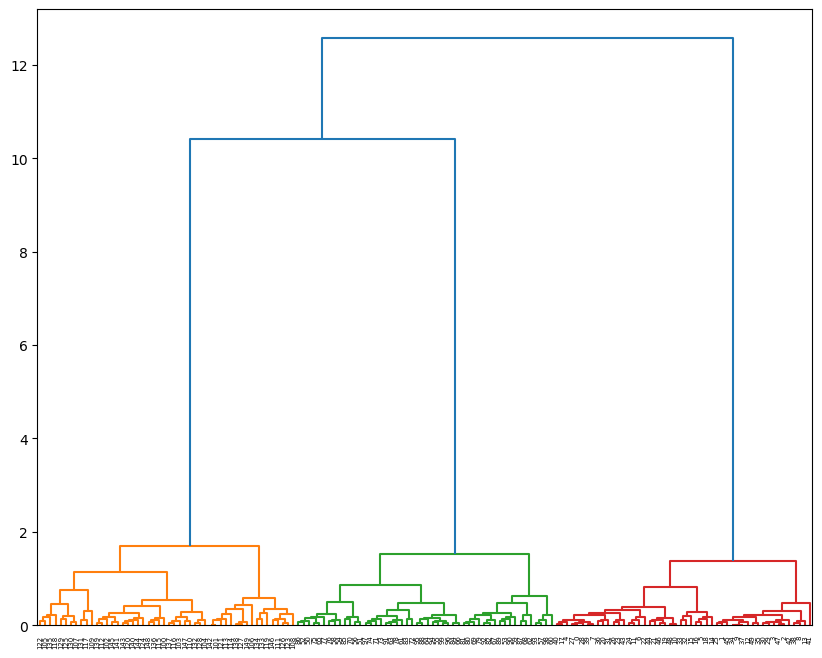

In [19]:
np.set_printoptions(suppress=True)
linked = linkage(scaled_iris_df, 'ward')
plt.figure(figsize=(10, 8))
dendrogram(linked, orientation='top', labels=range(0, len(scaled_iris_df)), distance_sort='descending', show_leaf_counts=True)
plt.show()

Train a Hierarchical Clustering model with n_clusters = 3 and visualize the cluster prediction on
the dataset with scatterplot (each cluster should have it’s own unique color in the scatterplot).

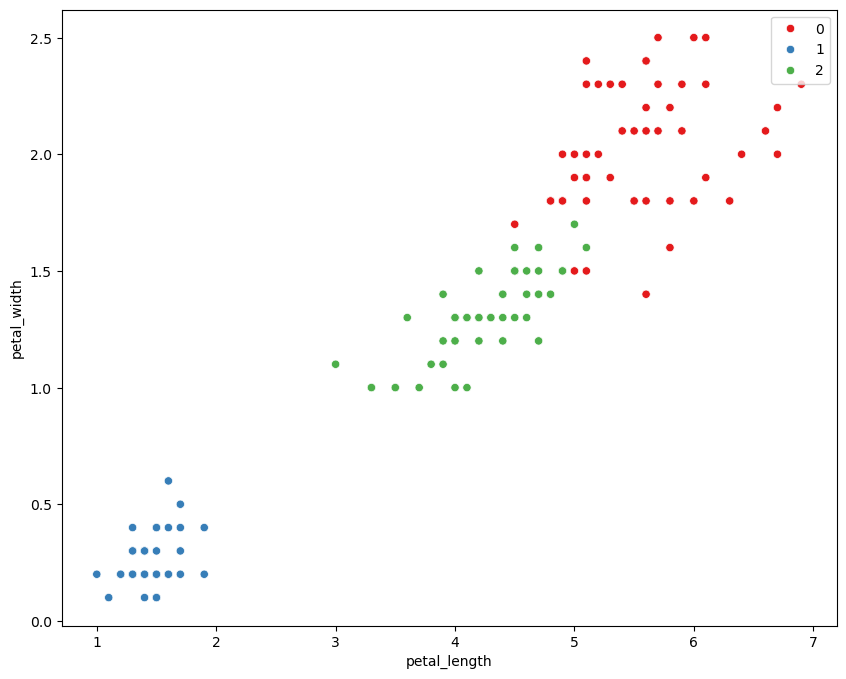

In [20]:
model = AgglomerativeClustering(n_clusters=3)
cluster_labels = model.fit_predict(scaled_iris_df)
plt.figure(figsize=(10, 8))
sns.scatterplot(iris_df, x='petal_length', y='petal_width', hue=cluster_labels, palette='Set1')
plt.show()



End of class 26/03